<a href="https://colab.research.google.com/github/WinetraubLab/coregister-xy/blob/main/register_two_rounds.ipynb" target="_blank">
<img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab"/></a>
<a href="https://github.com/WinetraubLab/coregister-xy/blob/main/register_two_rounds.ipynb" target="_blank">
  <img src="https://img.shields.io/badge/view%20in-GitHub-blue" alt="View in GitHub"/>
</a>

# Explanation

During 3D reconstruction we photobleach overlapping patterns (green and red in image below). These patterns were phtobleached in different sessions which means we need to calibrate them one vs the other. This script performs translation along xyz and rotation in xy plane to register the coordinate sysetms and adjust plane_inputs.

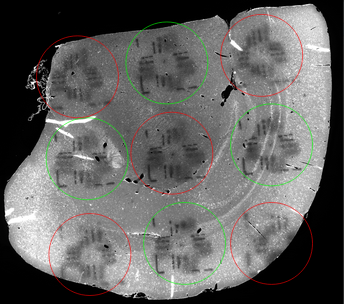

In [1]:
# @title Environment Setup
!git clone https://github.com/WinetraubLab/coregister-xy.git
%cd coregister-xy

from plane.fit_plane_elastic import FitPlaneElastic
import matplotlib.pyplot as plt
import os
from google.colab import files
import math
import pandas as pd
import numpy as np

%cd ..

fatal: destination path 'coregister-xy' already exists and is not an empty directory.
/content/coregister-xy
/content


In [2]:
# @title Inputs

# For each section below provide fit plane parameters for each pattern

# Earlier round, where photobleach coordinate system is known
r0_plane_inputs = []
r0_plane_inputs.append({
"uv_pix": [[194.0328626499378, 191.55314990120206], [70.9606241014886, 2121.038192106942], [2187.29457593229, 247.99624968526848], [2054.6665774926614, 2300.8774535581515]],
"xyz_mm": [[-1.0, 1.0, 0.088], [-1.0, -1.0, 0.092], [1.0, 1.0, 0.096], [1.0, -1.0, 0.116]],
"image_file_path": "/content/drive/Shareddrives/Yolab - Current Projects/Emilie/01 Brain/01 Brain test/BT 61E-64E/BT 61.2/06 register first few sections of each slide/01 unregistered sections/r2s1s1/r1/r2s1s1.tif",
"smoothing": 0.5
})
r0_plane_inputs.append({
"uv_pix": [[679.7659791081334, 660.7844022533963], [835.0989011682567, 2358.620829837322], [2446.6217623819143, 426.7022152883098], [2615.319941359092, 2197.827049217012]],
"xyz_mm": [[-1.0, 1.0, 0.106], [-1.0, -1.0, 0.114], [1.0, 1.0, 0.114], [1.0, -1.0, 0.134]],
"image_file_path": "/content/drive/Shareddrives/Yolab - Current Projects/Emilie/01 Brain/01 Brain test/BT 61E-64E/BT 61.2/06 register first few sections of each slide/01 unregistered sections/r2s1s6/r1/r2s1s6.tif",
"smoothing": 0.5
})
r0_plane_inputs.append({
"uv_pix": [[947.0302070659834, 196.50732550916166], [573.9591006255137, 1606.4700132288397], [2448.750466486962, 568.7994967191835], [2001.2831629611005, 2063.607559798886]],
"xyz_mm": [[-1.0, 1.0, 0.15], [-1.0, -1.0, 0.152], [1.0, 1.0, 0.156], [1.0, -1.0, 0.174]],
"image_file_path": "/content/drive/Shareddrives/Yolab - Current Projects/Emilie/01 Brain/01 Brain test/BT 61E-64E/BT 61.2/06 register first few sections of each slide/01 unregistered sections/r2s3s5/r1/r2s3s5.tif",
"smoothing": 0.5
})

# New round, where photobleach coordinate system is unknown
r1_plane_inputs = []
r1_plane_inputs.append({
"uv_pix": [[127.13353867937262, 1111.5960918587668], [1162.9540711138086, 203.88558807205197], [1103.8430060856265, 1197.434118179417], [1048.8176066637175, 2149.6006008181344], [2131.4125210334246, 1239.7997285306672]],
"xyz_mm": [[-1.0, 0.0, 0.0948], [0.0, 1.0, 0.0968], [0.0, 0.0, 0.0928], [0.0, -1.0, 0.1028], [1.0, 0.0, 0.1028]],
"image_file_path": "/content/drive/Shareddrives/Yolab - Current Projects/Emilie/01 Brain/01 Brain test/BT 61E-64E/BT 61.2/06 register first few sections of each slide/01 unregistered sections/r2s1s1/r1/r2s1s1.tif",
"smoothing": 0.5
})
r1_plane_inputs.append({
"uv_pix": [[762.0579201173548, 1443.059491285882], [1546.9060326169838, 526.4052635780774], [1638.2758044608424, 1407.227135248965], [1716.115726930181, 2271.881771185138], [2557.070257328325, 1311.8770963478933]],
"xyz_mm": [[-1.0, 0.0, 0.1148], [0.0, 1.0, 0.1148], [0.0, 0.0, 0.1128], [0.0, -1.0, 0.1148], [1.0, 0.0, 0.1188]],
"image_file_path": "/content/drive/Shareddrives/Yolab - Current Projects/Emilie/01 Brain/01 Brain test/BT 61E-64E/BT 61.2/06 register first few sections of each slide/01 unregistered sections/r2s1s6/r1/r2s1s6.tif",
"smoothing": 0.5
})
r1_plane_inputs.append({
"uv_pix": [[803.5810660109379, 863.4415772883613], [1698.7738172510171, 349.149202445806], [1488.286785589802, 1095.6335947562775], [1289.3090613134073, 1788.2351270288011], [2256.853914755029, 1296.217345132574]],
"xyz_mm": [[-1.0, 0.0, 0.15480000000000002], [0.0, 1.0, 0.15480000000000002], [0.0, 0.0, 0.15480000000000002], [0.0, -1.0, 0.15880000000000002], [1.0, 0.0, 0.1648]],
"image_file_path": "/content/drive/Shareddrives/Yolab - Current Projects/Emilie/01 Brain/01 Brain test/BT 61E-64E/BT 61.2/06 register first few sections of each slide/01 unregistered sections/r2s3s5/r1/r2s3s5.tif",
"smoothing": 0.5
})



In [11]:
# @title Auxiliry functions for this notebook
# Find the best transformation that would match the xyz of input points for r1 to the actual xyz according to r0
# The allowed transformations are xyz translation and rotation in xy plane
def fit_points(points1_movable, points2_fixed):
    # Ensure both point sets are numpy arrays
    points1 = np.array(points1_movable).squeeze()
    points2 = np.array(points2_fixed).squeeze()

    # 2D rotation and translation
    points1_2d = points1[:,:2]
    points2_2d = points2[:,:2]

    # Step 1: Translate points to their respective centroids
    centroid1 = np.mean(points1_2d, axis=0)
    centroid2 = np.mean(points2_2d, axis=0)
    points1_centered = points1_2d - centroid1
    points2_centered = points2_2d - centroid2

    # Step 2: Rotational alignment using Singular Value Decomposition
    H = np.dot(points1_centered.T, points2_centered)
    U, S, VT = np.linalg.svd(H)
    R = np.dot(VT.T, U.T)

    # Ensure a proper rotation matrix (det(R) should be +1)
    if np.linalg.det(R) < 0:
        VT[1,:] = -VT[1,:]
        R = np.dot(VT.T, U.T)
    rot_thetea_rad = np.arcsin(R[1,0])

    # Step 3: Calculate 2D translation
    T = centroid2 - np.dot(centroid1, R)

    # Step 4: Calculate translation in Z
    T2 = np.mean(points2[:,2] - points1[:,2])
    T = np.append(T, T2)

    return rot_thetea_rad, T


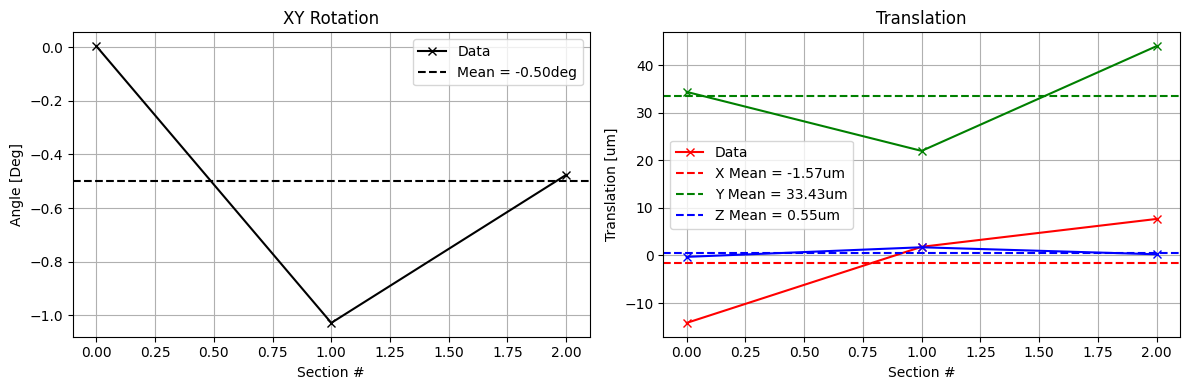

In [12]:
# @title Do the job
rotation_angles_rad = []
translations_mm = []

for r0_plane_input, r1_plane_input in zip(r0_plane_inputs, r1_plane_inputs):
  # Fit plane using the known coordinate system (r0)
  fp0 = FitPlaneElastic.from_points(r0_plane_input['uv_pix'],r0_plane_input['xyz_mm'], smoothing=r0_plane_input['smoothing'], consistency_check=False)

  # Find the physical position of r1 from uv according to r0
  xyz_01_mm =[]
  for uv in r1_plane_input['uv_pix']:
    xyz_01_mm.append(fp0.get_xyz_from_uv(uv))
  xyz_01_mm = np.array(xyz_01_mm)

  # Find best fit using the auxiliry function above
  theta, T = fit_points(r1_plane_input['xyz_mm'],xyz_01_mm)
  rotation_angles_rad.append(theta)
  translations_mm.append(T)

# Compute best fit
rotation_angles_rad = np.array(rotation_angles_rad)
translations_mm = np.array(translations_mm)
rotation_angles_rad_mean = np.mean(rotation_angles_rad)
translations_mm_mean = np.mean(translations_mm,axis=0)

# Plot coordinate systems conversion
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

# First subplot
ax[0].plot(rotation_angles_rad*180/np.pi, 'k-x', label='Data')
ax[0].axhline(y=rotation_angles_rad_mean*180/np.pi, color='k', linestyle='--',
              label=f'Mean = {rotation_angles_rad_mean*180/np.pi:.2f}deg')
ax[0].set_title('XY Rotation')
ax[0].set_xlabel('Section #')
ax[0].set_ylabel('Angle [Deg]')
ax[0].legend()
ax[0].grid(True)

# Second subplot
ax[1].plot(translations_mm[:,0]*1e3, 'r-x', label='Data')
ax[1].plot(translations_mm[:,1]*1e3, 'g-x')
ax[1].plot(translations_mm[:,2]*1e3, 'b-x')
ax[1].axhline(y=translations_mm_mean[0]*1e3, color='r', linestyle='--',
              label=f'X Mean = {translations_mm_mean[0]*1e3:.2f}um')
ax[1].axhline(y=translations_mm_mean[1]*1e3, color='g', linestyle='--',
              label=f'Y Mean = {translations_mm_mean[1]*1e3:.2f}um')
ax[1].axhline(y=translations_mm_mean[2]*1e3, color='b', linestyle='--',
              label=f'Z Mean = {translations_mm_mean[2]*1e3:.2f}um')
ax[1].set_title('Translation')
ax[1].set_xlabel('Section #')
ax[1].set_ylabel('Translation [um]')
ax[1].legend()
ax[1].grid(True)

# Adjust layout and show
plt.tight_layout()
plt.show()

In [13]:
# @title Adjust XYZ

R = [np.cos(rotation_angles_rad_mean), -np.sin(rotation_angles_rad_mean), 0, np.sin(rotation_angles_rad_mean), np.cos(rotation_angles_rad_mean), 0, 0, 0, 1]
R = np.array(R).reshape(3,3)
T = translations_mm_mean

r1_plane_inputs_adjusted = []
for r1_plane_input in r1_plane_inputs:
  xyz = np.array(r1_plane_input['xyz_mm'])
  xyz_adjusted = np.array(xyz)
  xyz_adjusted = (R @ xyz.T).T + T

  r1_plane_input = r1_plane_input.copy()
  r1_plane_input['xyz_mm'] = xyz_adjusted.tolist()
  r1_plane_inputs_adjusted.append(r1_plane_input)

for plane_input in r1_plane_inputs_adjusted:
  print(f"plane_inputs.append({{\n\"uv_pix\": {plane_input['uv_pix']},\n\"xyz_mm\": {plane_input['xyz_mm']},\n\"image_file_path\": \"{plane_input['image_file_path']}\"\n}})")

plane_inputs.append({
"uv_pix": [[127.13353867937262, 1111.5960918587668], [1162.9540711138086, 203.88558807205197], [1103.8430060856265, 1197.434118179417], [1048.8176066637175, 2149.6006008181344], [2131.4125210334246, 1239.7997285306672]],
"xyz_mm": [[-1.0015302981811538, 0.0421590098722752, 0.09535016019546352], [0.007163317128832072, 1.0333891498664491, 0.09735016019546353], [-0.0015684205290739104, 0.03342727221436922, 0.09335016019546352], [-0.010300158186979894, -0.9665346054377107, 0.10335016019546353], [0.9983934571230061, 0.024695534556463235, 0.10335016019546353]],
"image_file_path": "/content/drive/Shareddrives/Yolab - Current Projects/Emilie/01 Brain/01 Brain test/BT 61E-64E/BT 61.2/06 register first few sections of each slide/01 unregistered sections/r2s1s1/r1/r2s1s1.tif"
})
plane_inputs.append({
"uv_pix": [[762.0579201173548, 1443.059491285882], [1546.9060326169838, 526.4052635780774], [1638.2758044608424, 1407.227135248965], [1716.115726930181, 2271.881771185138], [255

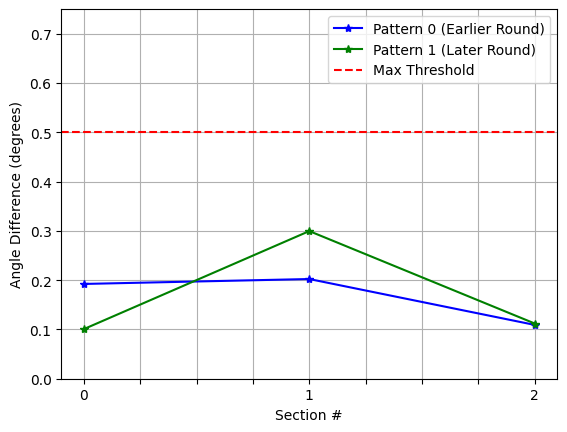

In [14]:
# @title Verify parallel planes

def compute_group_normal(fps):
  group_normal = np.array([0,0,0])
  for fp in fps:
    group_normal = group_normal + fp.normal_direction()
  group_normal = group_normal / np.linalg.norm(group_normal)
  return group_normal

def angle_between_group_avg_deg(fps, group_normal):
  #group_normal = compute_group_normal(fps)
  ang_diff = []
  for fp in fps:
    ang_diff.append(np.arccos(np.dot(fp.normal_direction(),group_normal))*180/np.pi)
  return ang_diff

# Fit planes
fp0s = []
fp1s = []
for r0_plane_input, r1_plane_input in zip(r0_plane_inputs, r1_plane_inputs):
  fp0 = FitPlane.from_template_centers(r0_plane_input['uv_pix'],r0_plane_input['xyz_mm'])
  fp0s.append(fp0)
  fp1 = FitPlane.from_template_centers(r1_plane_input['uv_pix'],r1_plane_input['xyz_mm'])
  fp1s.append(fp1)

group_normal = compute_group_normal(fp0s + fp1s)
fp0s_angle_deg = angle_between_group_avg_deg(fp0s, group_normal)
fp1s_angle_deg = angle_between_group_avg_deg(fp1s, group_normal)

# Plot
plt.plot(fp0s_angle_deg, 'b-*', label='Pattern 0 (Earlier Round)')
plt.plot(fp1s_angle_deg, 'g-*', label='Pattern 1 (Later Round)')
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda val, pos: '%d' % val if val % 1 == 0 else ''))
plt.xlabel('Section #')
plt.ylabel('Angle Difference (degrees)')
plt.ylim((0,0.75))
plt.grid(True)
plt.axhline(y=0.5, color='r', linestyle='--', label='Max Threshold')
plt.legend()
plt.show()